In [54]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns
#["Experiment_1_2024-10-09_17_20_37_666716", "Experiment_1_2024-10-09_19_23_14_435359"]
#log_path = "..\\..\\logdata\\Experiment_1_2024-10-09_17_20_37_666716"
log_path = "..\\..\\logdata\\Experiment_1_2024-10-09_19_23_14_435359"
os.path.exists(log_path)

True

Create a target folder for saving the figures

In [55]:
targ_dir = os.path.join(log_path, "Analysis")
if not os.path.exists(targ_dir):
    os.mkdir(targ_dir)

Import dataset

In [56]:
test_df = pd.read_csv(os.path.join(log_path, "classical_1.csv"), index_col=False)

Performing data cleaning

Filter out the last iterations from the dataset

In [57]:
result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)

Plotting the performance graph for the two objectives

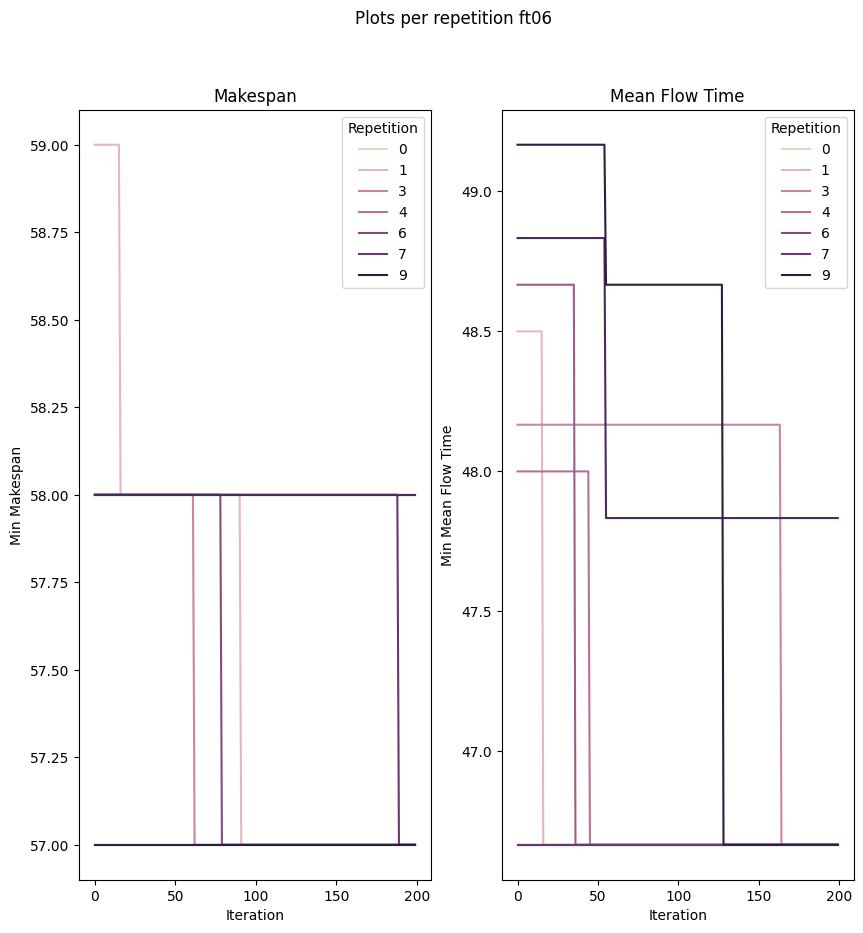

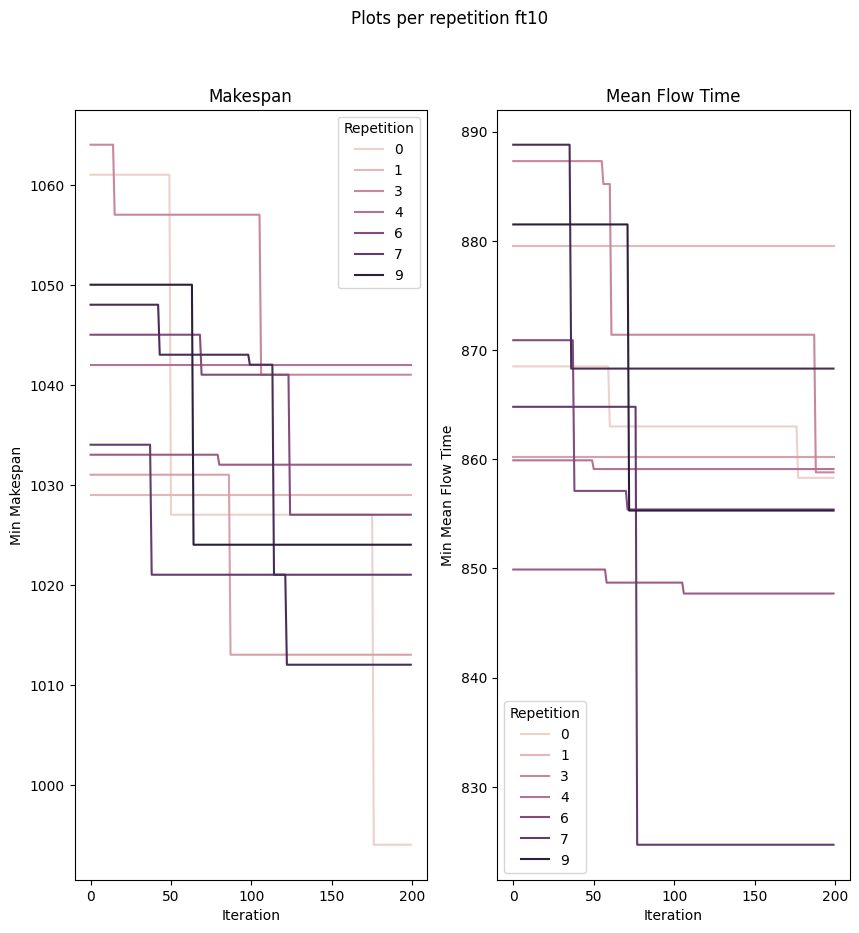

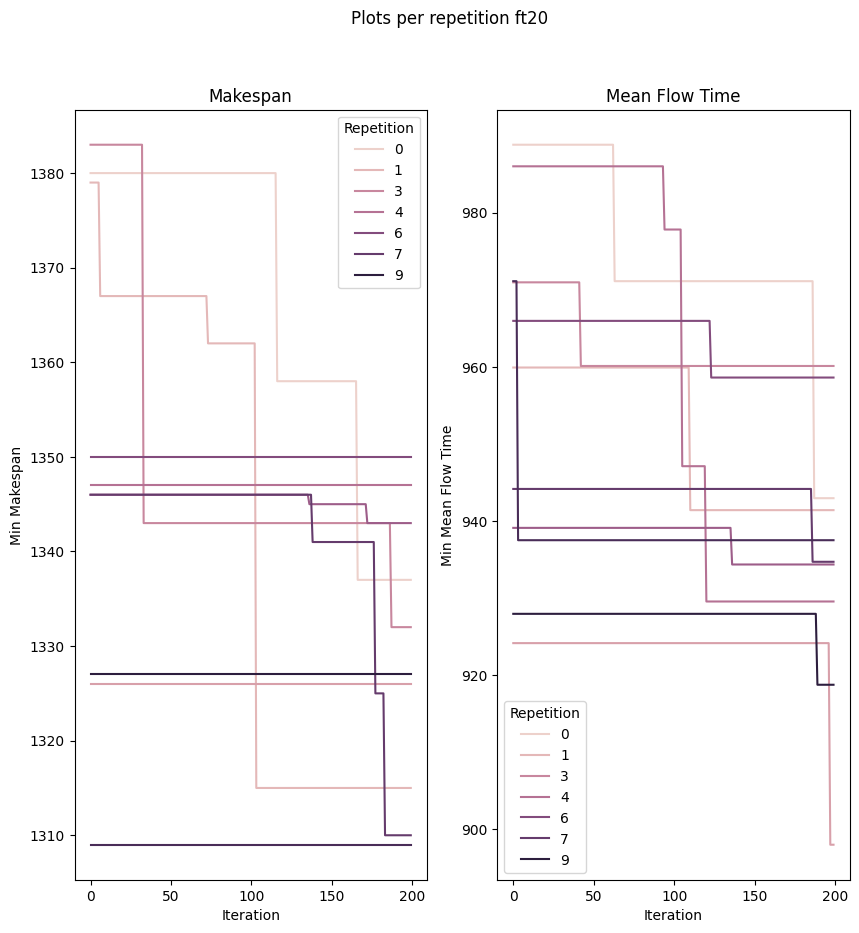

In [58]:
for problem in test_df["Problem"].unique():
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    plt.suptitle(f"Plots per repetition {str(problem)}")
    ax[0].set_title("Makespan")
    ax[1].set_title("Mean Flow Time")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Makespan", hue="Repetition", ax=ax[0])#, style="Candidate")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Mean Flow Time", hue="Repetition", ax=ax[1])
    plt.show()

Aggregate over repetitions to get average values and standard deviations for each metric at each iteration.

In [59]:
agg_columns = ["Time", "Min Makespan", "Max Makespan", "Avg Makespan", "Min Mean Flow Time", "Max Mean Flow Time", "Avg Mean Flow Time", "Spread", "N Fronts"]
agg_columns = list(test_df.columns[4:])
avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})
avg_df

C:\Users\b-mor\AppData\Local\Temp\ipykernel_17540\4239381174.py:3: FutureWarning: The provided callable <function std at 0x000001D17CC9ADC0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})


Time             Min Makespan             \
                                  mean         std         mean        std   
Problem Candidate Iteration                                                  
ft06    classical 0            1.76037    0.305522         57.9   0.567646   
                  1            2.65629    0.435416         57.9   0.567646   
                  2            3.56955    0.562990         57.9   0.567646   
                  3            4.47664    0.713870         57.9   0.567646   
                  4            5.38012    0.780058         57.9   0.567646   
...                                ...         ...          ...        ...   
ft20    classical 195        734.67812  109.871754       1329.6  14.908610   
                  196        738.32708  110.394188       1329.6  14.908610   
                  197        741.99569  110.961764       1329.6  14.908610   
                  198        745.53985  111.440032       1329.6  14.908610   
                  199        749.17983  112.000078       1329.6  14.908610   

                            Max Makespan            Avg Makespan             \
                                    mean        std         mean        std   
Problem Candidate Iteration                                                   
ft06    classical 0                 62.4   6.363088    60.010000   3.195639   
                  1                 62.4   6.363088    60.020000   3.197499   
                  2                 62.4   6.363088    60.020000   3.197499   
                  3                 62.4   6.363088    60.020000   3.197499   
                  4                 62.4   6.363088    60.020000   3.197499   
...                                  ...        ...          ...        ...   
ft20    classical 195             1377.8  53.754173  1349.029286  23.635445   
                  196             1377.8  53.754173  1349.029286  23.635445   
                  197             1386.6  52.241320  1351.929286  22.498666   
                  198             1386.6  52.241320  1351.929286  22.498666   
                  199             1386.6  52.241320  1351.929286  22.498666   

                            Min Mean Flow Time            Max Mean Flow Time  \
                                          mean        std               mean   
Problem Candidate Iteration                                                    
ft06    classical 0                     47.800   1.026801               62.4   
                  1                     47.800   1.026801               62.4   
                  2                     47.800   1.026801               62.4   
                  3                     47.800   1.026801               62.4   
                  4                     47.800   1.026801               62.4   
...                                        ...        ...                ...   
ft20    classical 195                  938.205  13.361064             1377.8   
                  196                  938.205  13.361064             1377.8   
                  197                  935.590  18.126650             1386.6   
                  198                  935.590  18.126650             1386.6   
                  199                  935.590  18.126650             1386.6   

                                       Avg Mean Flow Time             \
                                   std               mean        std   
Problem Candidate Iteration                                            
ft06    classical 0           6.363088          48.273333   1.593257   
                  1           6.363088          48.255000   1.568853   
                  2           6.363088          48.255000   1.568853   
                  3           6.363088          48.255000   1.568853   
                  4           6.363088          48.255000   1.568853   
...                                ...                ...        ...   
ft20    classical 195        53.754173         966.082357  21.514

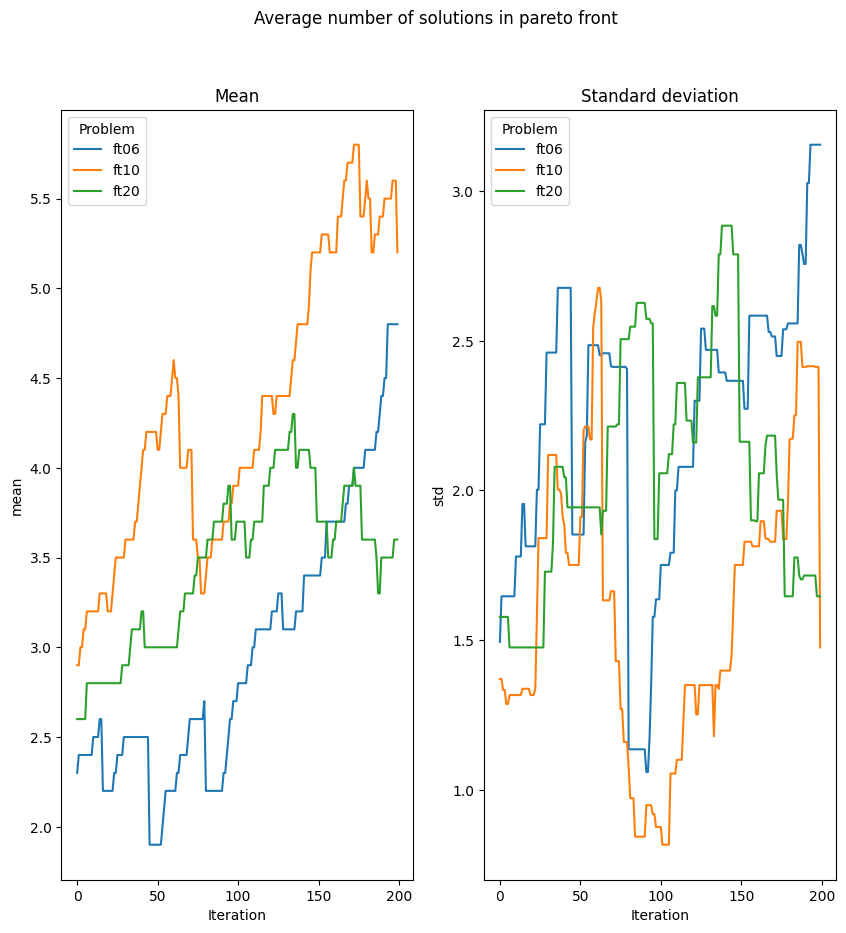

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average number of solutions in pareto front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Avg_n_solutions"))
plt.show()

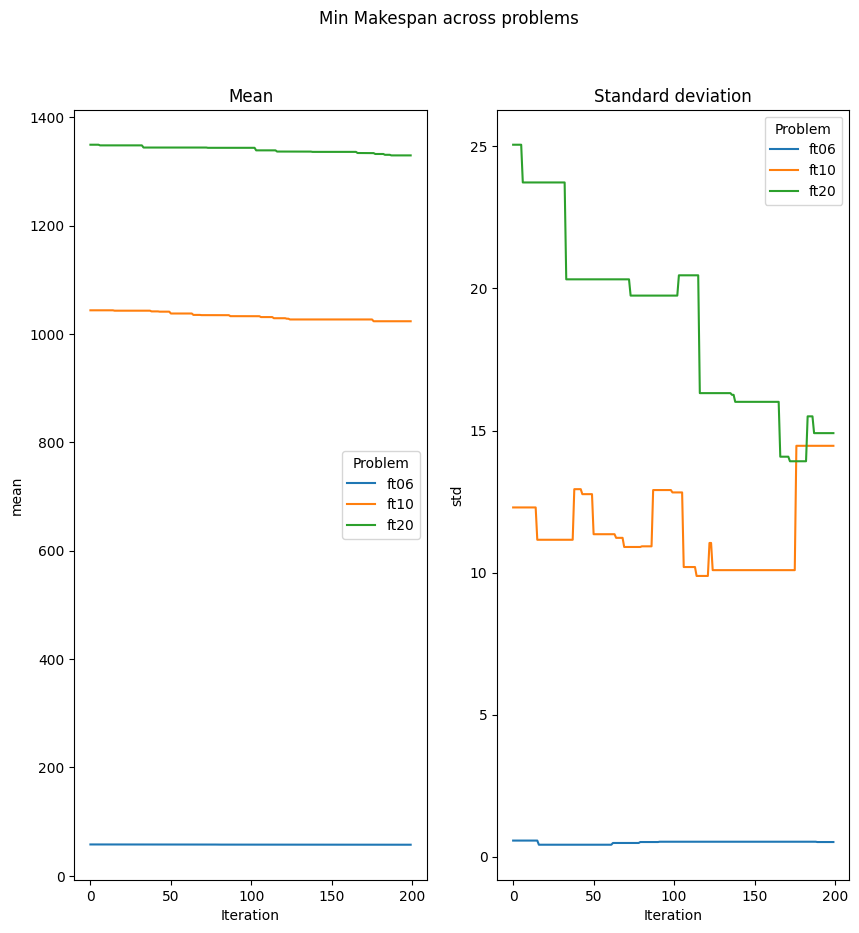

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan across problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Makespan"))
plt.show()
    

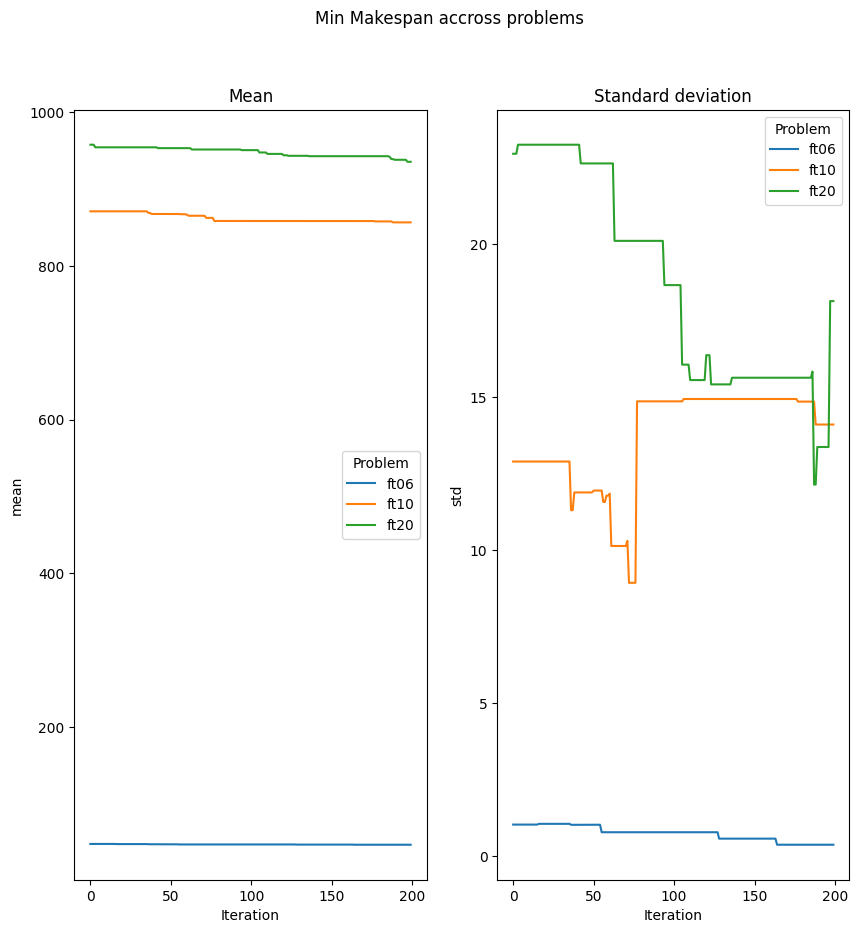

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan accross problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Mean_Flow_Time"))
plt.show()

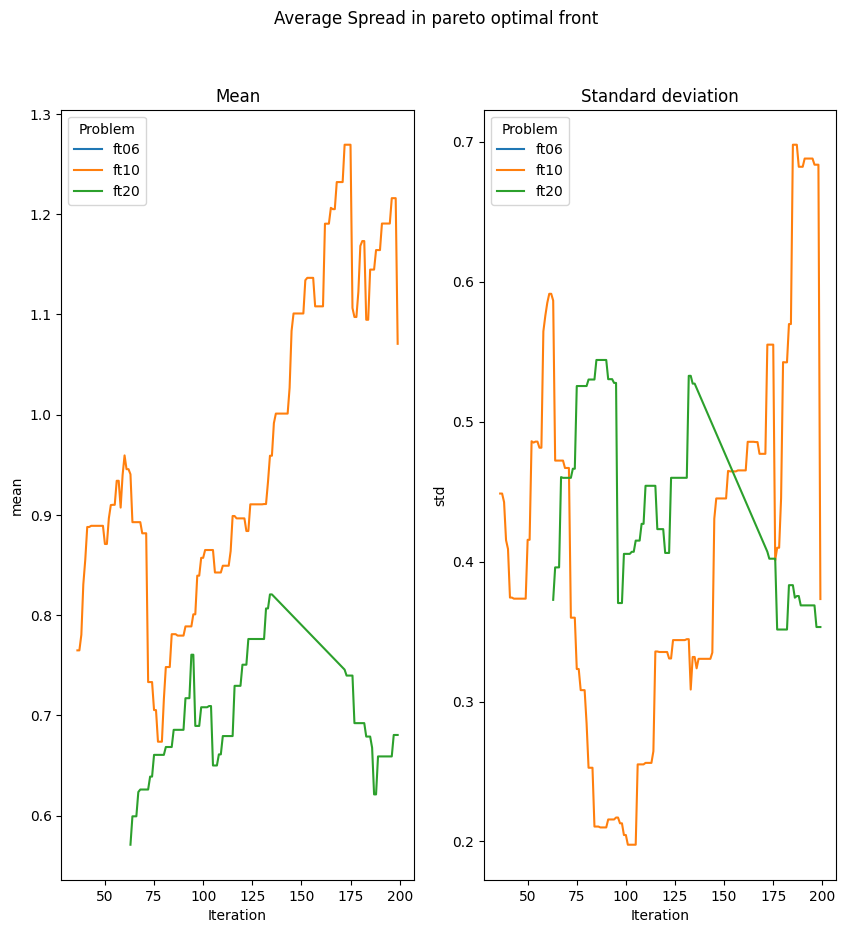

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average Spread in pareto optimal front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Spread"))
plt.show()

The average metrics for the final iterations

In [64]:
result_df = result_df.groupby(["Problem", "Candidate"]).agg({col_name : ["mean", "std"] for col_name in agg_columns})
result_df.to_csv(os.path.join(targ_dir, "result.csv"))

In [65]:
result_df

Time              Min Makespan             \
                        mean          std         mean        std   
Problem Candidate                                                   
ft06    classical  177.48156    13.075308         57.4   0.516398   
ft10    classical  887.73836  1051.484052       1023.5  14.462595   
ft20    classical  749.17983   112.000078       1329.6  14.908610   

                  Max Makespan            Avg Makespan             \
                          mean        std         mean        std   
Problem Candidate                                                   
ft06    classical         59.0   3.162278    58.087051   1.109088   
ft10    classical       1120.5  43.648215  1062.861667  16.662963   
ft20    classical       1386.6  52.241320  1351.929286  22.498666   

                  Min Mean Flow Time            Max Mean Flow Time             \
                                mean        std               mean        std   
Problem Candidate                                                               
ft06    classical          46.783333   0.368932               59.0   3.162278   
ft10    classical         856.730000  14.094999             1120.5  43.648215   
ft20    classical         935.590000  18.126650             1386.6  52.241320   

                  Avg Mean Flow Time               Spread           N Fronts  \
                                mean        std      mean       std     mean   
Problem Candidate                                                              
ft06    classical          47.629765   1.063541       inf       NaN      9.2   
ft10    classical         882.936917  10.068908  1.070562  0.373213     12.6   
ft20    classical         964.524357  23.661363  0.680380  0.353220     15.5   

                            N Non-dominated solutions            
                        std                      mean       std  
Problem Candidate                                                
ft06    classical  1.813529                       4.8  3.155243  
ft10    classical  1.264911                       5.2  1.475730  
ft20    classical  1.269296                       3.6  1.646545

In [66]:
test_df

,Problem,Candidate,Repetition,Iteration,Time,Min Makespan,Max Makespan,Avg Makespan,Min Mean Flow Time,Max Mean Flow Time,Avg Mean Flow Time,Spread,N Fronts,N Non-dominated solutions
0,ft06,classical,0,0,1.2211,58.0,58.0,58.000000,46.666667,58.0,46.666667,inf,15,1
1,ft06,classical,0,1,1.8539,58.0,58.0,58.000000,46.666667,58.0,46.666667,inf,15,1
2,ft06,classical,0,2,2.4641,58.0,58.0,58.000000,46.666667,58.0,46.666667,inf,15,1
3,ft06,classical,0,3,3.1135,58.0,58.0,58.000000,46.666667,58.0,46.666667,inf,15,1
4,ft06,classical,0,4,3.9820,58.0,58.0,58.000000,46.666667,58.0,46.666667,inf,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,ft20,classical,9,195,676.8350,1327.0,1413.0,1370.666667,918.750000,1413.0,937.916667,0.543296,16,3
5996,ft20,classical,9,196,680.1052,1327.0,1413.0,1370.666667,918.750000,1413.0,937.916667,0.543296,16,3
5997,ft20,classical,9,197,683.3699,1327.0,1413.0,1370.666667,918.750000,1413.0,937.916667,0.543296,16,3
5998,ft20,classical,9,198,686.6839,1327.0,1413.0,1370.666667,918.750000,1413.0,937.916667,0.543296,17,3


Accessing the OR-library benchmarks

In [67]:
test_benchmark_collection = BenchmarkCollection(make_web_request=False)

In [68]:
cur_problem_names = test_df["Problem"].unique()
for p, v in test_benchmark_collection.benchmark_collection.items():
    if p in cur_problem_names:
        print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

ft06 6 x 6
ft10 10 x 10
ft20 20 x 5


In [69]:

for p, v in test_benchmark_collection.benchmark_collection.items():
    print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

abz5 10 x 10
abz6 10 x 10
abz7 20 x 15
abz8 20 x 15
abz9 20 x 15
ft06 6 x 6
ft10 10 x 10
ft20 20 x 5
la01 10 x 5
la02 10 x 5
la03 10 x 5
la04 10 x 5
la05 10 x 5
la06 15 x 5
la07 15 x 5
la08 15 x 5
la09 15 x 5
la10 15 x 5
la11 20 x 5
la12 20 x 5
la13 20 x 5
la14 20 x 5
la15 20 x 5
la16 10 x 10
la17 10 x 10
la18 10 x 10
la19 10 x 10
la20 10 x 10
la21 15 x 10
la22 15 x 10
la23 15 x 10
la24 15 x 10
la25 15 x 10
la26 20 x 10
la27 20 x 10
la28 20 x 10
la29 20 x 10
la30 20 x 10
la31 30 x 10
la32 30 x 10
la33 30 x 10
la34 30 x 10
la35 30 x 10
la36 15 x 15
la37 15 x 15
la38 15 x 15
la39 15 x 15
la40 15 x 15
orb01 10 x 10
orb02 10 x 10
orb03 10 x 10
orb04 10 x 10
orb05 10 x 10
orb06 10 x 10
orb07 10 x 10
orb08 10 x 10
orb09 10 x 10
orb10 10 x 10
swv01 20 x 10
swv02 20 x 10
swv03 20 x 10
swv04 20 x 10
swv05 20 x 10
swv06 20 x 15
swv07 20 x 15
swv08 20 x 15
swv09 20 x 15
swv10 20 x 15
swv11 50 x 10
swv12 50 x 10
swv13 50 x 10
swv14 50 x 10
swv15 50 x 10
swv16 50 x 10
swv17 50 x 10
swv18 50 x 10
sw

In [70]:
plt.cm.viridis(0.9)

(0.741388, 0.873449, 0.149561, 1.0)

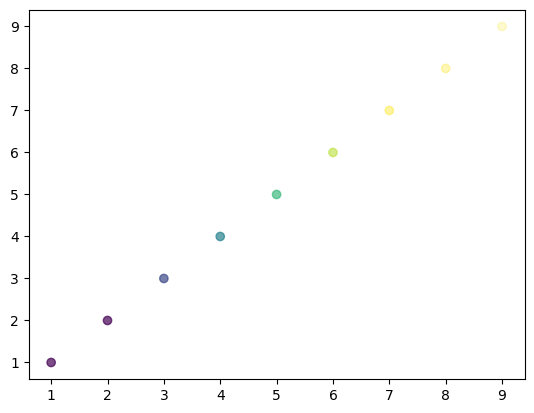

In [71]:
import matplotlib.pyplot as plt

test_x = [1,2,3,4,5,6,7,8,9]
test_y = [1,2,3,4,5,6,7,8,9]
colors = [plt.cm.viridis(((i-1)/len(test_x))*2) for i in range(len(test_x))]
for i in range(len(colors)):
    temp = list(colors[i])
    temp[-1] = np.min([1- (i-1)/(len(colors)), 0.7])
    colors[i] = temp
plt.scatter(test_x, test_y, c=colors)

In [72]:
with open("..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9", "rb") as pop_dump:
    pop_obj = pickle.load(pop_dump)

N = 50
for i, start in enumerate(pop_obj.front_start_index):
    print("New front: " + str(i))
    cur_front = pop_obj.get_front_range(i)

    end = cur_front[1]
    if end > N:
        # limit the end and length of front
        x_list = np.empty(cur_front[-1]-N)
        y_list = np.empty(cur_front[-1]-N)
        end = N
    else:
        x_list = np.empty(cur_front[-1])
        y_list = np.empty(cur_front[-1])

    for j, ind in enumerate(pop_obj.R[cur_front[0] : end]):
        x, y = ind.cur_fitness
        x_list[j] = x
        y_list[j] = y

    index_sort = x_list.argsort()
    index_sort = np.flip(index_sort)
    y_list = y_list[index_sort]
    x_list = x_list[index_sort]
    #y_list.sort()
    print(x_list, y_list)
    plt.plot(x_list, y_list)
    plt.scatter(x_list, y_list)

        
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9'